In [8]:
# Importing pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Read the CSV file from Google Drive
data = pd.read_csv('/content/drive/MyDrive/Portfolio/A-BTest/cookie_cats.csv')

# Print the first rows
print(data.head())

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


A/B Testing

In [11]:
# Counting the number of players in each AB group.
print(data.groupby('version').count())


         userid  sum_gamerounds  retention_1  retention_7
version                                                  
gate_30   44700           44700        44700        44700
gate_40   45489           45489        45489        45489


Text(0, 0.5, 'User Count')

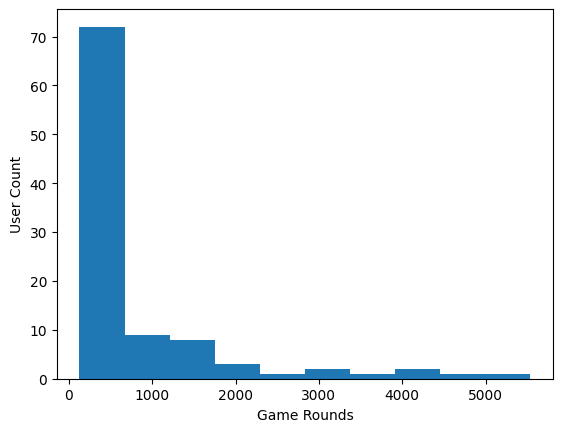

In [12]:
# Counting the number of players for each number of game rounds
plot_data = data.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_data.head(n=100).plot(x="sum_gamerounds", y="userid", kind="hist")
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")

Overall 1-day retention

In [13]:
# The % of users that came back the day after they installed
data['retention_1'].mean()


0.4452095044850259

1-day retention by AB-group

In [14]:
# Calculating 1-day retention for each AB-group
data.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Bootstraping

<Figure size 1000x600 with 0 Axes>

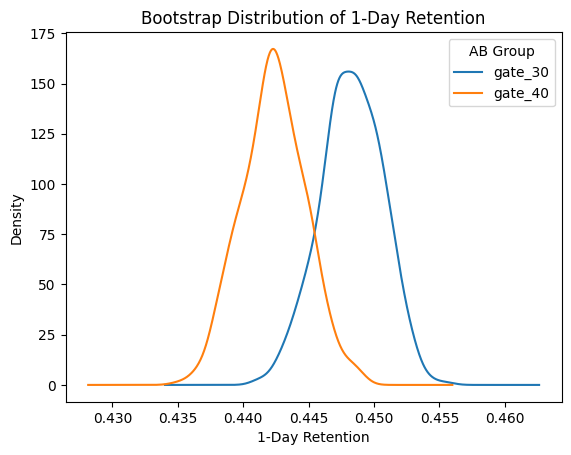

In [15]:
# Set the number of bootstrap replications
iterations = 500

# Creating a list with bootstrapped means for each AB-group
boot_1d = []
for i in range(iterations):
    boot_sample = data.sample(frac=1, replace=True)  # Perform bootstrap sampling with replacement
    boot_mean = boot_sample.groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)

# Plotting the Kernel Density Estimate plot of the bootstrap distributions
plt.figure(figsize=(10, 6))
boot_1d.plot(kind='density')
plt.xlabel('1-Day Retention')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of 1-Day Retention')
plt.legend(title='AB Group')
plt.show()

Difference

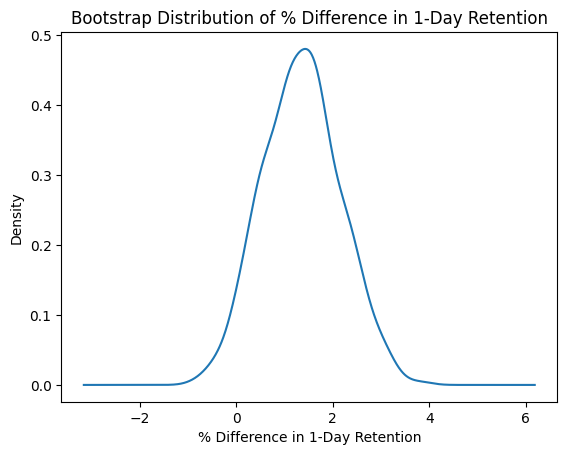

In [16]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40']) * 100

# Plotting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_xlabel('% Difference in 1-Day Retention')
ax.set_ylabel('Density')
plt.title('Bootstrap Distribution of % Difference in 1-Day Retention')
plt.show()


Probability of a difference

In [17]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).mean()

# Pretty printing the probability
formatted_prob = "{:.2%}".format(prob)
print("Probability of higher 1-day retention with gate at level 30:", formatted_prob)

Probability of higher 1-day retention with gate at level 30: 96.20%


7-day retention by AB-group

In [18]:
# Calculating 7-day retention for both AB-groups
retention_7day = data.groupby('version')['retention_7'].mean()

# Display the proportion of True values for each group
print("7-Day Retention by AB-group:")
print(retention_7day)

7-Day Retention by AB-group:
version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


Bootstrapping the difference again

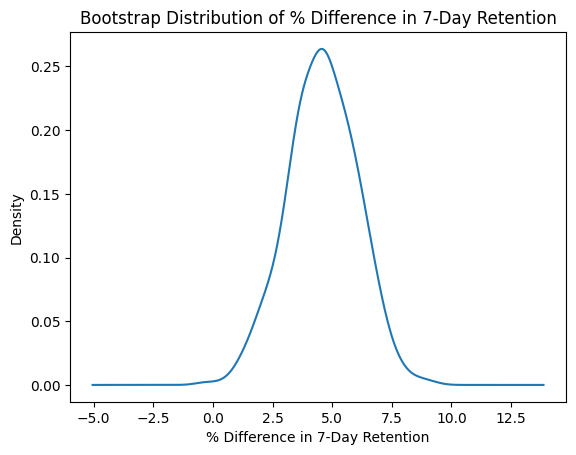

Probability of higher 7-day retention with gate at level 30: 99.80%


In [19]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_sample = data.sample(frac=1, replace=True)  # Perform bootstrap sampling with replacement
    boot_mean = boot_sample.groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40']) * 100

# Plotting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_xlabel("% Difference in 7-Day Retention")
ax.set_ylabel("Density")
plt.title("Bootstrap Distribution of % Difference in 7-Day Retention")
plt.show()

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).mean()

# Pretty printing the probability
formatted_prob = "{:.2%}".format(prob)
print("Probability of higher 7-day retention with gate at level 30:", formatted_prob)